In [1]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/jdelga01/Desktop/MatPlotLib Assigment/city_data.csv"
ride_data_to_load = "C:/Users/jdelga01/Desktop/MatPlotLib Assigment/ride_data.csv"
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
pyber_data=pd.merge(ride_data, city_data, how="left", on="city")

In [2]:
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


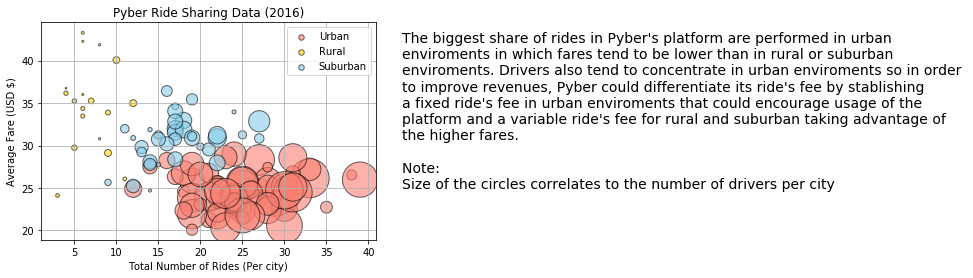

In [10]:
u_avg_fare=pyber_data.loc[pyber_data["type"]=="Urban"].groupby(["city"]).mean()["fare"]
r_avg_fare=pyber_data.loc[pyber_data["type"]=="Rural"].groupby(["city"]).mean()["fare"]
s_avg_fare=pyber_data.loc[pyber_data["type"]=="Suburban"].groupby(["city"]).mean()["fare"]
u_rides=pyber_data.loc[pyber_data["type"]=="Urban"].groupby(["city"]).count()["ride_id"]
r_rides=pyber_data.loc[pyber_data["type"]=="Rural"].groupby(["city"]).count()["ride_id"]
s_rides=pyber_data.loc[pyber_data["type"]=="Suburban"].groupby(["city"]).count()["ride_id"]

u_driver=pyber_data.loc[pyber_data["type"]=="Urban"].groupby(["city"]).sum()["driver_count"]/1.5
r_driver=pyber_data.loc[pyber_data["type"]=="Rural"].groupby(["city"]).sum()["driver_count"]/1.5
s_driver=pyber_data.loc[pyber_data["type"]=="Suburban"].groupby(["city"]).sum()["driver_count"]/1.5


plt.scatter(u_rides, u_avg_fare, marker="o", c="salmon", edgecolors="black", alpha=0.6, s=u_driver)
plt.scatter(r_rides, r_avg_fare, marker="o", c="gold", edgecolors="black", alpha=0.6, s=r_driver)
plt.scatter(s_rides, s_avg_fare, marker="o", c="skyblue", edgecolors="black", alpha=0.6, s=s_driver)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare (USD $)")
plt.grid(True)
scat_pyber=plt.legend(("Urban","Rural","Suburban"),loc='upper right')
scat_pyber.legendHandles[0]._sizes = [30]
scat_pyber.legendHandles[1]._sizes = [30]
scat_pyber.legendHandles[2]._sizes = [30]
text="The biggest share of rides in Pyber's platform are performed in urban \nenviroments in which fares tend to be lower than in rural or suburban \nenviroments. Drivers also tend to concentrate in urban enviroments so in order \nto improve revenues, Pyber could differentiate its ride's fee by stablishing \na fixed ride's fee in urban enviroments that could encourage usage of the \nplatform and a variable ride's fee for rural and suburban taking advantage of \nthe higher fares.\n\nNote: \nSize of the circles correlates to the number of drivers per city"
plt.text(44, 25,text, fontsize=14)
plt.savefig("C:/Users/jdelga01/Desktop/MatPlotLib Assigment/pyber_farevsrides.jpg", bbox_inches="tight")

In [4]:
plt.show()

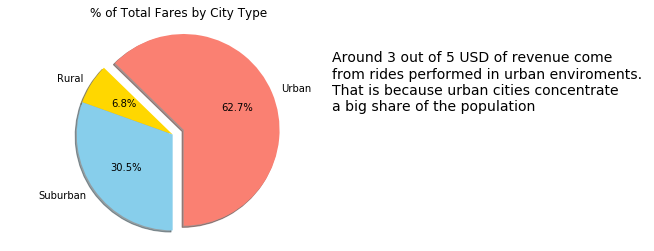

In [21]:
city_type=["Urban","Rural","Suburban"]
u_pct_fare=(pyber_data.loc[pyber_data["type"]=="Urban"].sum()["fare"])/(pyber_data["fare"].sum())*100
r_pct_fare=(pyber_data.loc[pyber_data["type"]=="Rural"].sum()["fare"])/(pyber_data["fare"].sum())*100
s_pct_fare=(pyber_data.loc[pyber_data["type"]=="Suburban"].sum()["fare"])/(pyber_data["fare"].sum())*100
fare_percentages=[u_pct_fare,r_pct_fare,s_pct_fare]
plt.title("% of Total Fares by City Type")
explode=[0.15,0,0]

plt.pie(fare_percentages, explode=explode, labels=city_type, colors=["salmon","gold","skyblue"], autopct="%1.1f%%", shadow=True, 
        startangle=270, radius=1.2)

text="Around 3 out of 5 USD of revenue come \nfrom rides performed in urban enviroments. \nThat is because urban cities concentrate \na big share of the population"
plt.text(2,0.3,text, fontsize=14)

plt.axis("equal")
plt.savefig("C:/Users/jdelga01/Desktop/MatPlotLib Assigment/fare_pie.jpg",bbox_inches="tight")
plt.show()

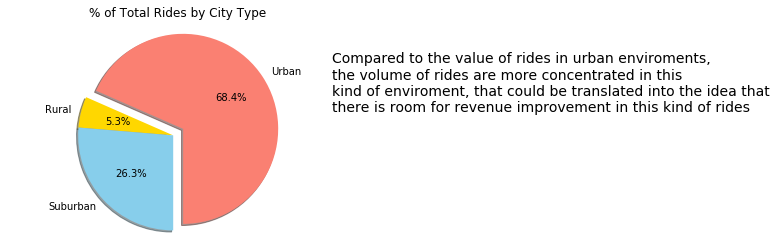

In [22]:
city_type=["Urban","Rural","Suburban"]
u_pct_rides=(pyber_data.loc[pyber_data["type"]=="Urban"].count()["ride_id"])/(pyber_data["ride_id"].count())*100
r_pct_rides=(pyber_data.loc[pyber_data["type"]=="Rural"].count()["ride_id"])/(pyber_data["ride_id"].count())*100
s_pct_rides=(pyber_data.loc[pyber_data["type"]=="Suburban"].count()["ride_id"])/(pyber_data["ride_id"].count())*100
rides_percentages=[u_pct_rides,r_pct_rides,s_pct_rides]
plt.title("% of Total Rides by City Type")
explode=[0.15,0,0]

plt.pie(rides_percentages, explode=explode, labels=city_type, colors=["salmon","gold","skyblue"], autopct="%1.1f%%", shadow=True, 
        startangle=270, radius=1.2)
plt.axis("equal")
text="Compared to the value of rides in urban enviroments, \nthe volume of rides are more concentrated in this \nkind of enviroment, that could be translated into the idea that \nthere is room for revenue improvement in this kind of rides"
plt.text(2,0.3,text, fontsize=14)

plt.savefig("C:/Users/jdelga01/Desktop/MatPlotLib Assigment/ride_pie.jpg",bbox_inches="tight")
plt.show()

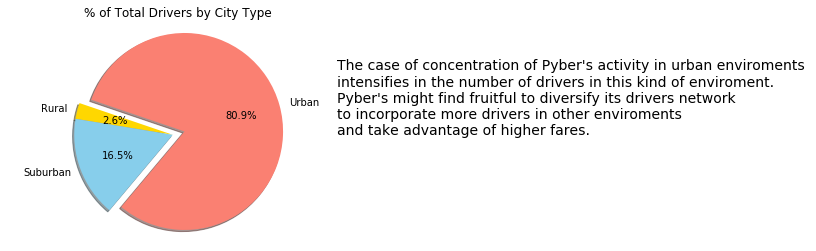

In [29]:
city_type=["Urban","Rural","Suburban"]
u_pct_drivers=(city_data.loc[city_data["type"]=="Urban"].sum()["driver_count"])/(city_data["driver_count"].sum())*100
r_pct_drivers=(city_data.loc[city_data["type"]=="Rural"].sum()["driver_count"])/(city_data["driver_count"].sum())*100
s_pct_drivers=(city_data.loc[city_data["type"]=="Suburban"].sum()["driver_count"])/(city_data["driver_count"].sum())*100
drivers_percentages=[u_pct_drivers,r_pct_drivers,s_pct_drivers]
plt.title("% of Total Drivers by City Type")
explode=[0.15,0,0]


plt.pie(drivers_percentages, explode=explode, labels=city_type, colors=["salmon","gold","skyblue"], autopct="%1.1f%%", shadow=True, 
        startangle=230, radius=1.2)
plt.axis("equal")
text="The case of concentration of Pyber's activity in urban enviroments \nintensifies in the number of drivers in this kind of enviroment. \nPyber's might find fruitful to diversify its drivers network \nto incorporate more drivers in other enviroments \nand take advantage of higher fares."
plt.text(2,0,text, fontsize=14)

plt.savefig("C:/Users/jdelga01/Desktop/MatPlotLib Assigment/drivers_pie.jpg",bbox_inches="tight")
plt.show()